## Introduction to Data Science

### Analizing Data - Decision Trees

In [1]:
import os
import codecs
import time
import datetime
import pathlib

import pandas as pd
import numpy as np
import scipy.stats as ss
import scipy.signal as signal
from scipy.io.arff import loadarff

import matplotlib.pyplot as plt
import matplotlib.dates as md
from matplotlib import pylab as pl

Specifying the path to the files: (Weka formatted files)

In [2]:
datapath = pathlib.Path("../Data/CSV/")
outputs = pathlib.Path("../outputs/")

bank = loadarff(os.path.join(datapath,"bank.arff"))
df_bank = pd.DataFrame(bank[0])
df_bank.head()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48.0,b'FEMALE',b'INNER_CITY',17546.0,b'NO',b'1',b'NO',b'NO',b'NO',b'NO',b'YES'
1,40.0,b'MALE',b'TOWN',30085.1,b'YES',b'3',b'YES',b'NO',b'YES',b'YES',b'NO'
2,51.0,b'FEMALE',b'INNER_CITY',16575.4,b'YES',b'0',b'YES',b'YES',b'YES',b'NO',b'NO'
3,23.0,b'FEMALE',b'TOWN',20375.4,b'YES',b'3',b'NO',b'NO',b'YES',b'NO',b'NO'
4,57.0,b'FEMALE',b'RURAL',50576.3,b'YES',b'0',b'NO',b'YES',b'NO',b'NO',b'NO'


In [3]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          600 non-null    float64
 1   sex          600 non-null    object 
 2   region       600 non-null    object 
 3   income       600 non-null    float64
 4   married      600 non-null    object 
 5   children     600 non-null    object 
 6   car          600 non-null    object 
 7   save_act     600 non-null    object 
 8   current_act  600 non-null    object 
 9   mortgage     600 non-null    object 
 10  pep          600 non-null    object 
dtypes: float64(2), object(9)
memory usage: 51.7+ KB


In [4]:
features = set(df_bank.columns)
features -= set(['age','income']) # only categorical values
features

{'car',
 'children',
 'current_act',
 'married',
 'mortgage',
 'pep',
 'region',
 'save_act',
 'sex'}

In [5]:
for feature in features:
    print(u'Feature {} has unique values: {}'.format(feature, df_bank[feature].unique()))

Feature region has unique values: [b'INNER_CITY' b'TOWN' b'RURAL' b'SUBURBAN']
Feature married has unique values: [b'NO' b'YES']
Feature pep has unique values: [b'YES' b'NO']
Feature car has unique values: [b'NO' b'YES']
Feature mortgage has unique values: [b'NO' b'YES']
Feature save_act has unique values: [b'NO' b'YES']
Feature sex has unique values: [b'FEMALE' b'MALE']
Feature current_act has unique values: [b'NO' b'YES']
Feature children has unique values: [b'1' b'3' b'0' b'2']


#### Discretizing Data

In [6]:
df_bank2 = df_bank.copy()

df_bank2.children = df_bank.children.map(int)
df_bank2.age = df_bank.age.map(int)

dict_convert_true_false = {b'YES': 1, b'NO': 0}
df_bank2['married'] = df_bank['married'].map(dict_convert_true_false)
df_bank2['save_act'] = df_bank['save_act'].map(dict_convert_true_false)
df_bank2['current_act'] = df_bank['current_act'].map(dict_convert_true_false)
df_bank2['mortgage'] = df_bank['mortgage'].map(dict_convert_true_false)
df_bank2['pep'] = df_bank['pep'].map(dict_convert_true_false)
df_bank2['car'] = df_bank['car'].map(dict_convert_true_false)

dict_convert_gender = {b'FEMALE':1, b'MALE':0}
df_bank2['sex'] = df_bank['sex'].map(dict_convert_gender)

dict_convert_region = {b'INNER_CITY':0, b'TOWN':1, b'SUBURBAN':2, b'RURAL':3}
df_bank2['region'] = df_bank['region'].map(dict_convert_region)

In [7]:
df_bank2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          600 non-null    int64  
 1   sex          600 non-null    int64  
 2   region       600 non-null    int64  
 3   income       600 non-null    float64
 4   married      600 non-null    int64  
 5   children     600 non-null    int64  
 6   car          600 non-null    int64  
 7   save_act     600 non-null    int64  
 8   current_act  600 non-null    int64  
 9   mortgage     600 non-null    int64  
 10  pep          600 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 51.7 KB


In [8]:
df_bank2.head()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48,1,0,17546.0,0,1,0,0,0,0,1
1,40,0,1,30085.1,1,3,1,0,1,1,0
2,51,1,0,16575.4,1,0,1,1,1,0,0
3,23,1,1,20375.4,1,3,0,0,1,0,0
4,57,1,3,50576.3,1,0,0,1,0,0,0


In [9]:
byPEP = df_bank2.groupby(['pep'])
byPEP.describe().T

pep                      0           1
age      count  326.000000  274.000000
         mean    40.098160   45.127737
         std     14.123506   14.327991
         min     18.000000   18.000000
         25%     27.000000   34.000000
...                    ...         ...
mortgage min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      0.000000    0.000000
         75%      1.000000    1.000000
         max      1.000000    1.000000

[80 rows x 2 columns]

In [10]:
byPEP.describe()

age                                                        sex  \
     count       mean        std   min   25%   50%   75%   max  count   
pep                                                                     
0    326.0  40.098160  14.123506  18.0  27.0  40.0  51.0  67.0  326.0   
1    274.0  45.127737  14.327991  18.0  34.0  45.0  58.0  67.0  274.0   

               ... current_act      mortgage                                \
         mean  ...         75%  max    count      mean       std  min  25%   
pep            ...                                                           
0    0.521472  ...         1.0  1.0    326.0  0.358896  0.480414  0.0  0.0   
1    0.474453  ...         1.0  1.0    274.0  0.335766  0.473122  0.0  0.0   

                    
     50%  75%  max  
pep                 
0    0.0  1.0  1.0  
1    0.0  1.0  1.0  

[2 rows x 80 columns]

In [11]:
df_bank2[(df_bank2.sex == 0) & (df_bank2.pep == 0)].describe()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
count,156.00000,156.0,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.0
mean,39.00641,0.0,0.974359,24292.705449,0.737179,1.083333,0.474359,0.724359,0.743590,0.397436,0.0
std,13.59103,0.0,1.095143,11756.606525,0.441583,1.180259,0.500950,0.448276,0.438057,0.490944,0.0
min,18.00000,0.0,0.000000,5014.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,26.00000,0.0,0.000000,14601.425000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,39.00000,0.0,1.000000,22172.400000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.0
75%,48.00000,0.0,1.250000,31959.950000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.0
max,67.00000,0.0,3.000000,57671.700000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.0


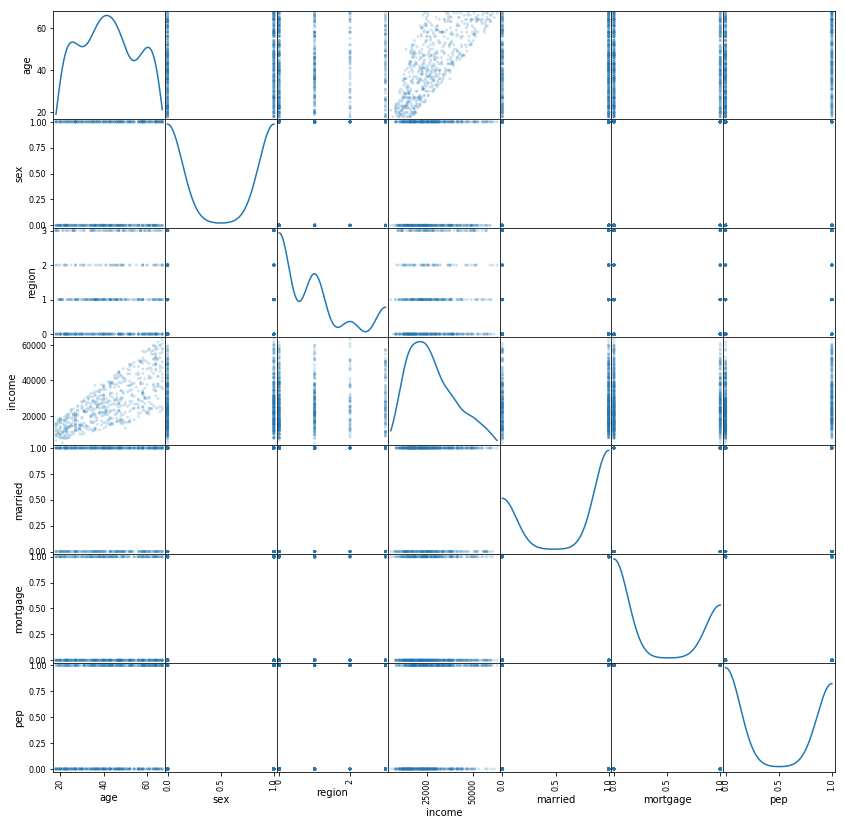

In [12]:
from pandas.plotting import scatter_matrix

my_features = ['age', 'sex', 'region', 'income', 'married', 'mortgage', 'pep']

#fig = scatter_matrix(df_bank2, alpha=0.2, figsize=(14, 14), diagonal='kde')
fig = scatter_matrix(df_bank2[my_features], alpha=0.2, figsize=(14, 14), diagonal='kde')

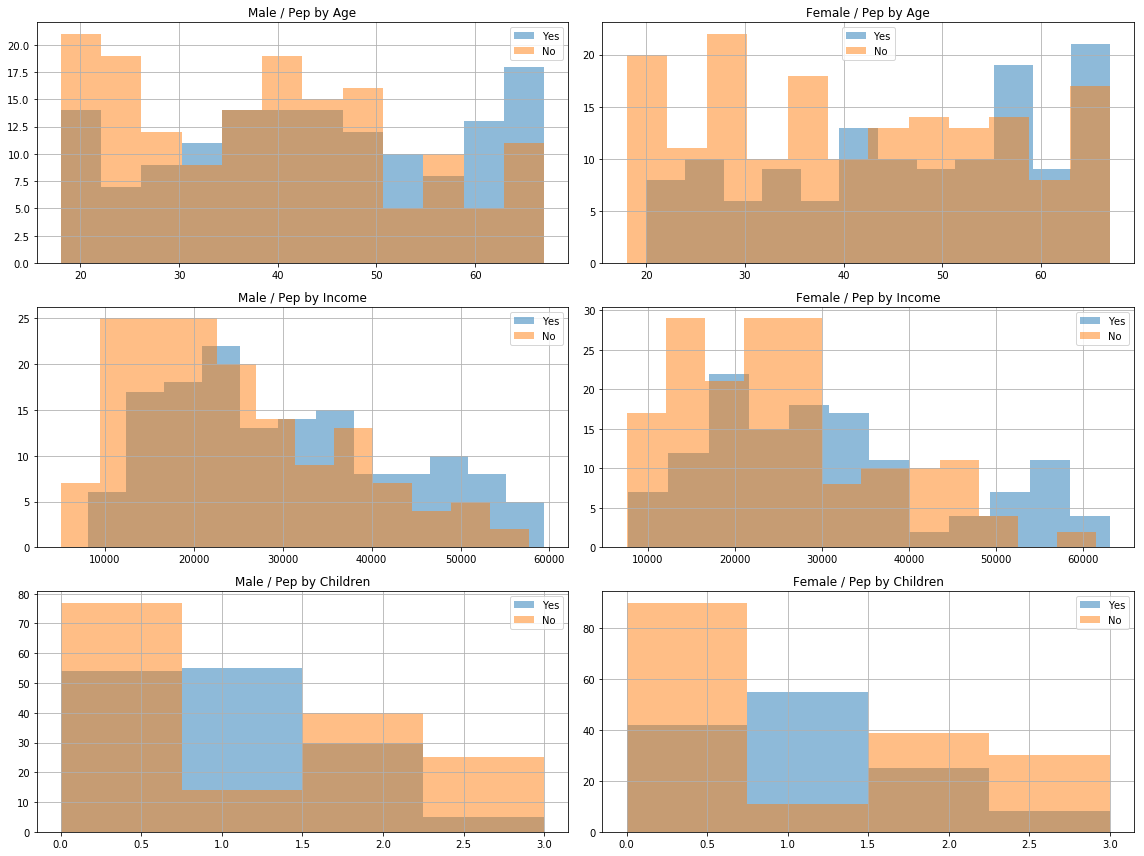

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16,12))

df_bank2[(df_bank2.sex == 0) & (df_bank2.pep == 1)]['age'].hist(ax=axes[0,0], bins=12, alpha=0.5, label='Yes')
df_bank2[(df_bank2.sex == 0) & (df_bank2.pep == 0)]['age'].hist(ax=axes[0,0], bins=12, alpha=0.5, label='No')
axes[0,0].set_title('Male / Pep by Age')
axes[0,0].legend()

df_bank2[(df_bank2.sex == 1) & (df_bank2.pep == 1)]['age'].hist(ax=axes[0,1], bins=12, alpha=0.5, label='Yes')
df_bank2[(df_bank2.sex == 1) & (df_bank2.pep == 0)]['age'].hist(ax=axes[0,1], bins=12, alpha=0.5, label='No')
axes[0,1].set_title('Female / Pep by Age')
axes[0,1].legend()

df_bank2[(df_bank2.sex == 0) & (df_bank2.pep == 1)]['income'].hist(ax=axes[1,0], bins=12, alpha=0.5, label='Yes')
df_bank2[(df_bank2.sex == 0) & (df_bank2.pep == 0)]['income'].hist(ax=axes[1,0], bins=12, alpha=0.5, label='No')
axes[1,0].set_title('Male / Pep by Income')
axes[1,0].legend()

df_bank2[(df_bank2.sex == 1) & (df_bank2.pep == 1)]['income'].hist(ax=axes[1,1], bins=12, alpha=0.5, label='Yes')
df_bank2[(df_bank2.sex == 1) & (df_bank2.pep == 0)]['income'].hist(ax=axes[1,1], bins=12, alpha=0.5, label='No')
axes[1,1].set_title('Female / Pep by Income')
axes[1,1].legend()

df_bank2[(df_bank2.sex == 0) & (df_bank2.pep == 1)]['children'].hist(ax=axes[2,0], bins=4, alpha=0.5, label='Yes')
df_bank2[(df_bank2.sex == 0) & (df_bank2.pep == 0)]['children'].hist(ax=axes[2,0], bins=4, alpha=0.5, label='No')
axes[2,0].set_title('Male / Pep by Children')
axes[2,0].legend()

df_bank2[(df_bank2.sex == 1) & (df_bank2.pep == 1)]['children'].hist(ax=axes[2,1], bins=4, alpha=0.5, label='Yes')
df_bank2[(df_bank2.sex == 1) & (df_bank2.pep == 0)]['children'].hist(ax=axes[2,1], bins=4, alpha=0.5, label='No')
axes[2,1].set_title('Female / Pep by Children')
axes[2,1].legend()

fig.tight_layout()

### [Building a Decision Tree](http://scikit-learn.org/stable/modules/tree.html)

[1](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), [2](http://stackoverflow.com/questions/18753709/how-to-make-sense-the-output-of-decisiontreeclassifier-in-scikit-learn), [3](http://stackoverflow.com/questions/23557545/how-to-explain-the-decision-tree-from-scikit-learn), [4](https://github.com/paulgb/sklearn-pandas)

In [14]:
#Install http://www.graphviz.org/ & 
#Instal https://pypi.python.org/pypi/pydotplus

#http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn import tree
from io import StringIO
from IPython.display import Image #needed to render in notebook
import pydotplus

In [15]:
#clf = tree.DecisionTreeClassifier(criterion='entropy', max_features="auto", min_samples_leaf=10)
clf = tree.DecisionTreeClassifier(criterion='gini', max_features=None, min_samples_leaf=10)
features_list=['age', 'sex', 'region', 'income', 'married', 'children', 'car', 'save_act', 'current_act', 'mortgage']
clf.fit(df_bank2[features_list], df_bank2.pep)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [16]:
print(clf.n_features_)
print(clf.feature_importances_)

10
[0.02177207 0.00644846 0.01016284 0.32653792 0.10364701 0.27096397
 0.00046857 0.11597806 0.00757892 0.13644217]


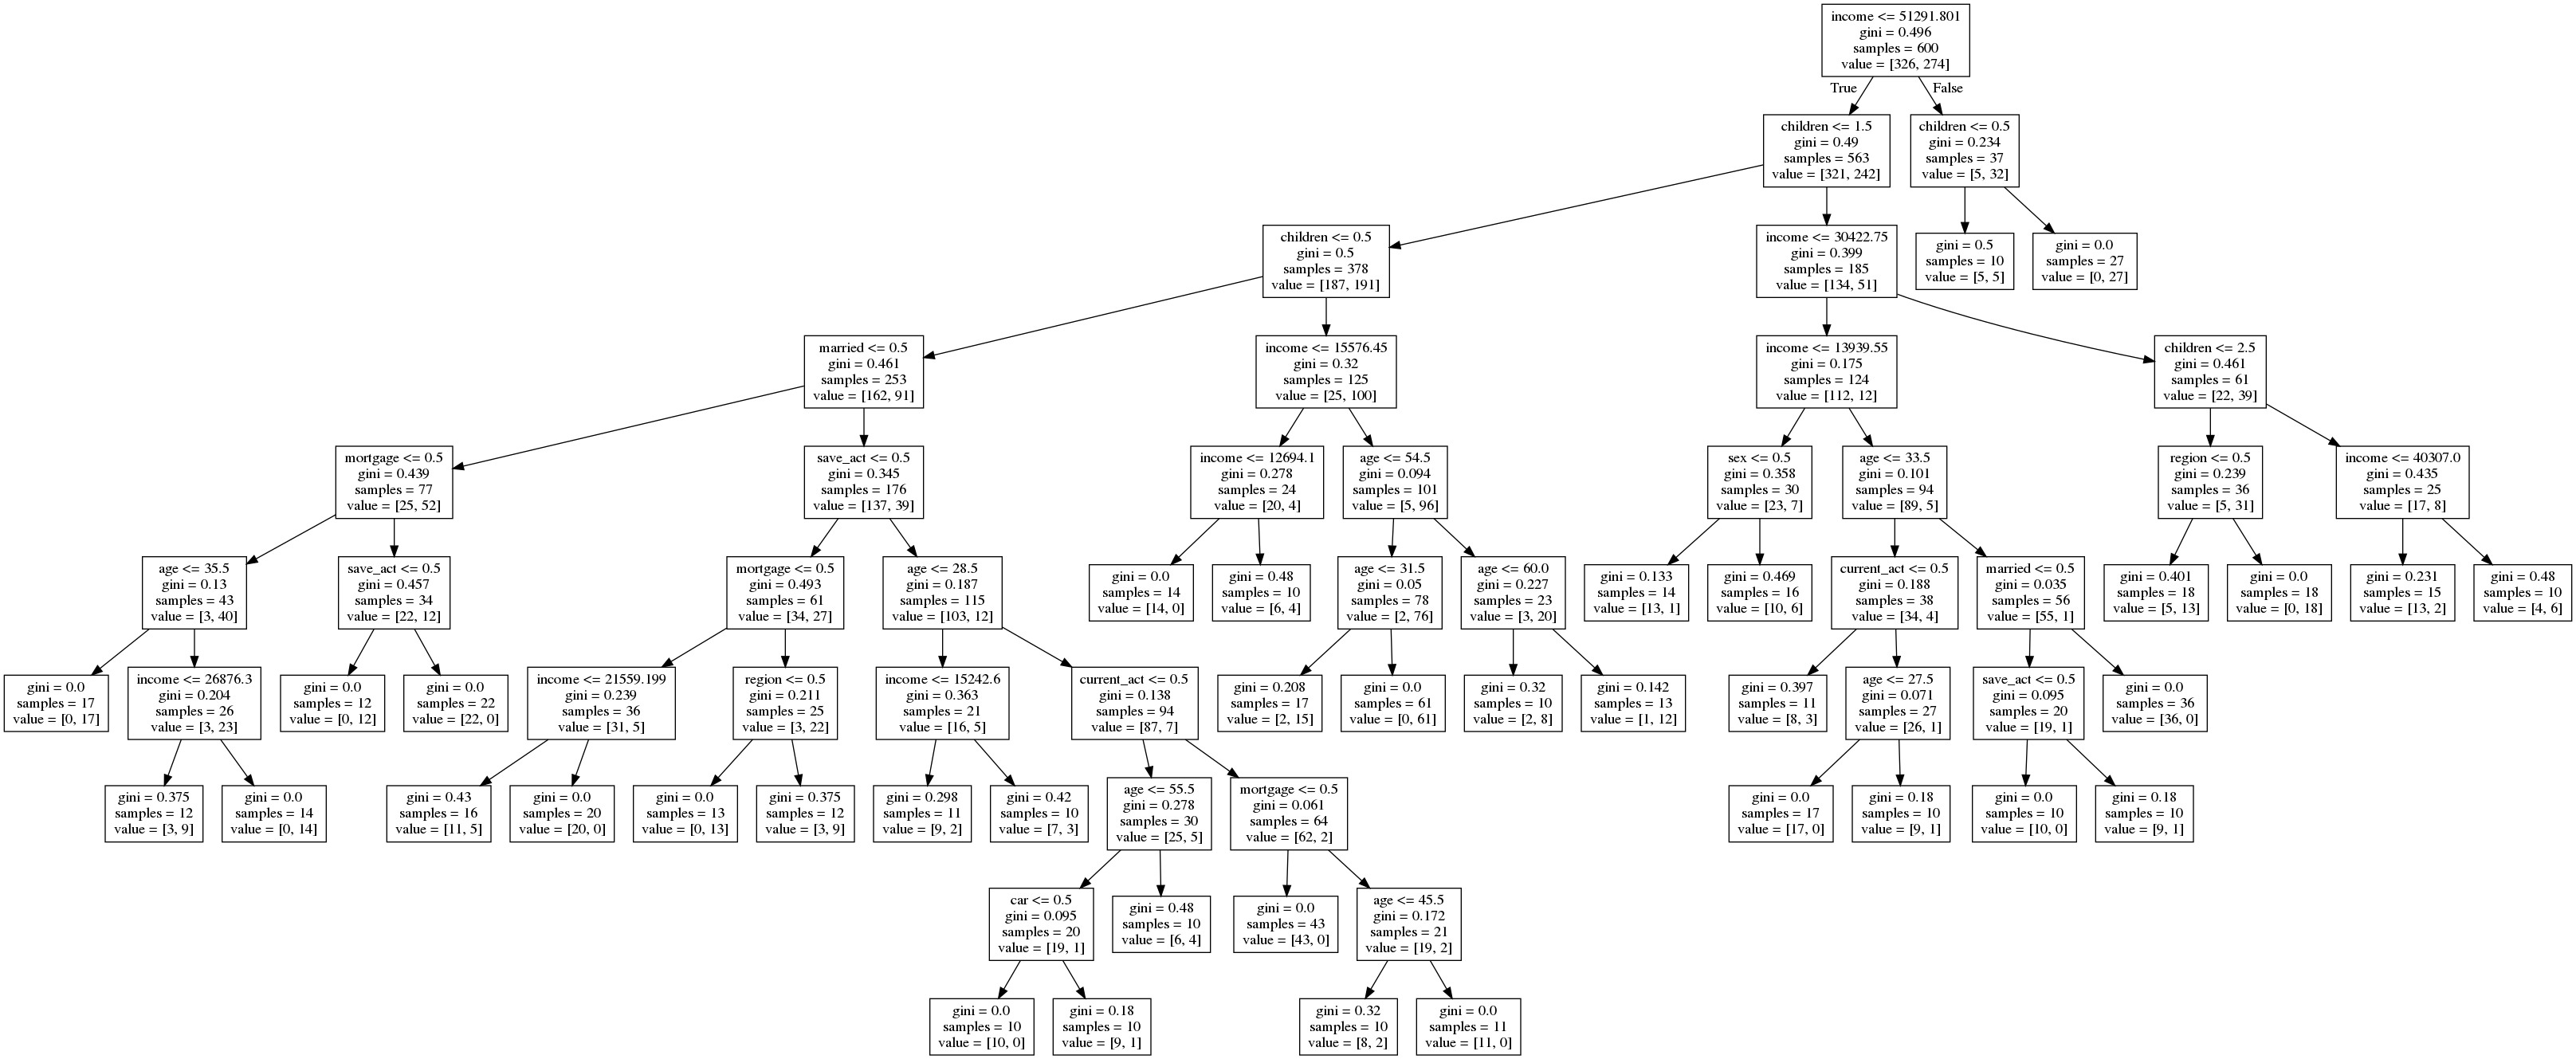

In [17]:
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=features_list) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

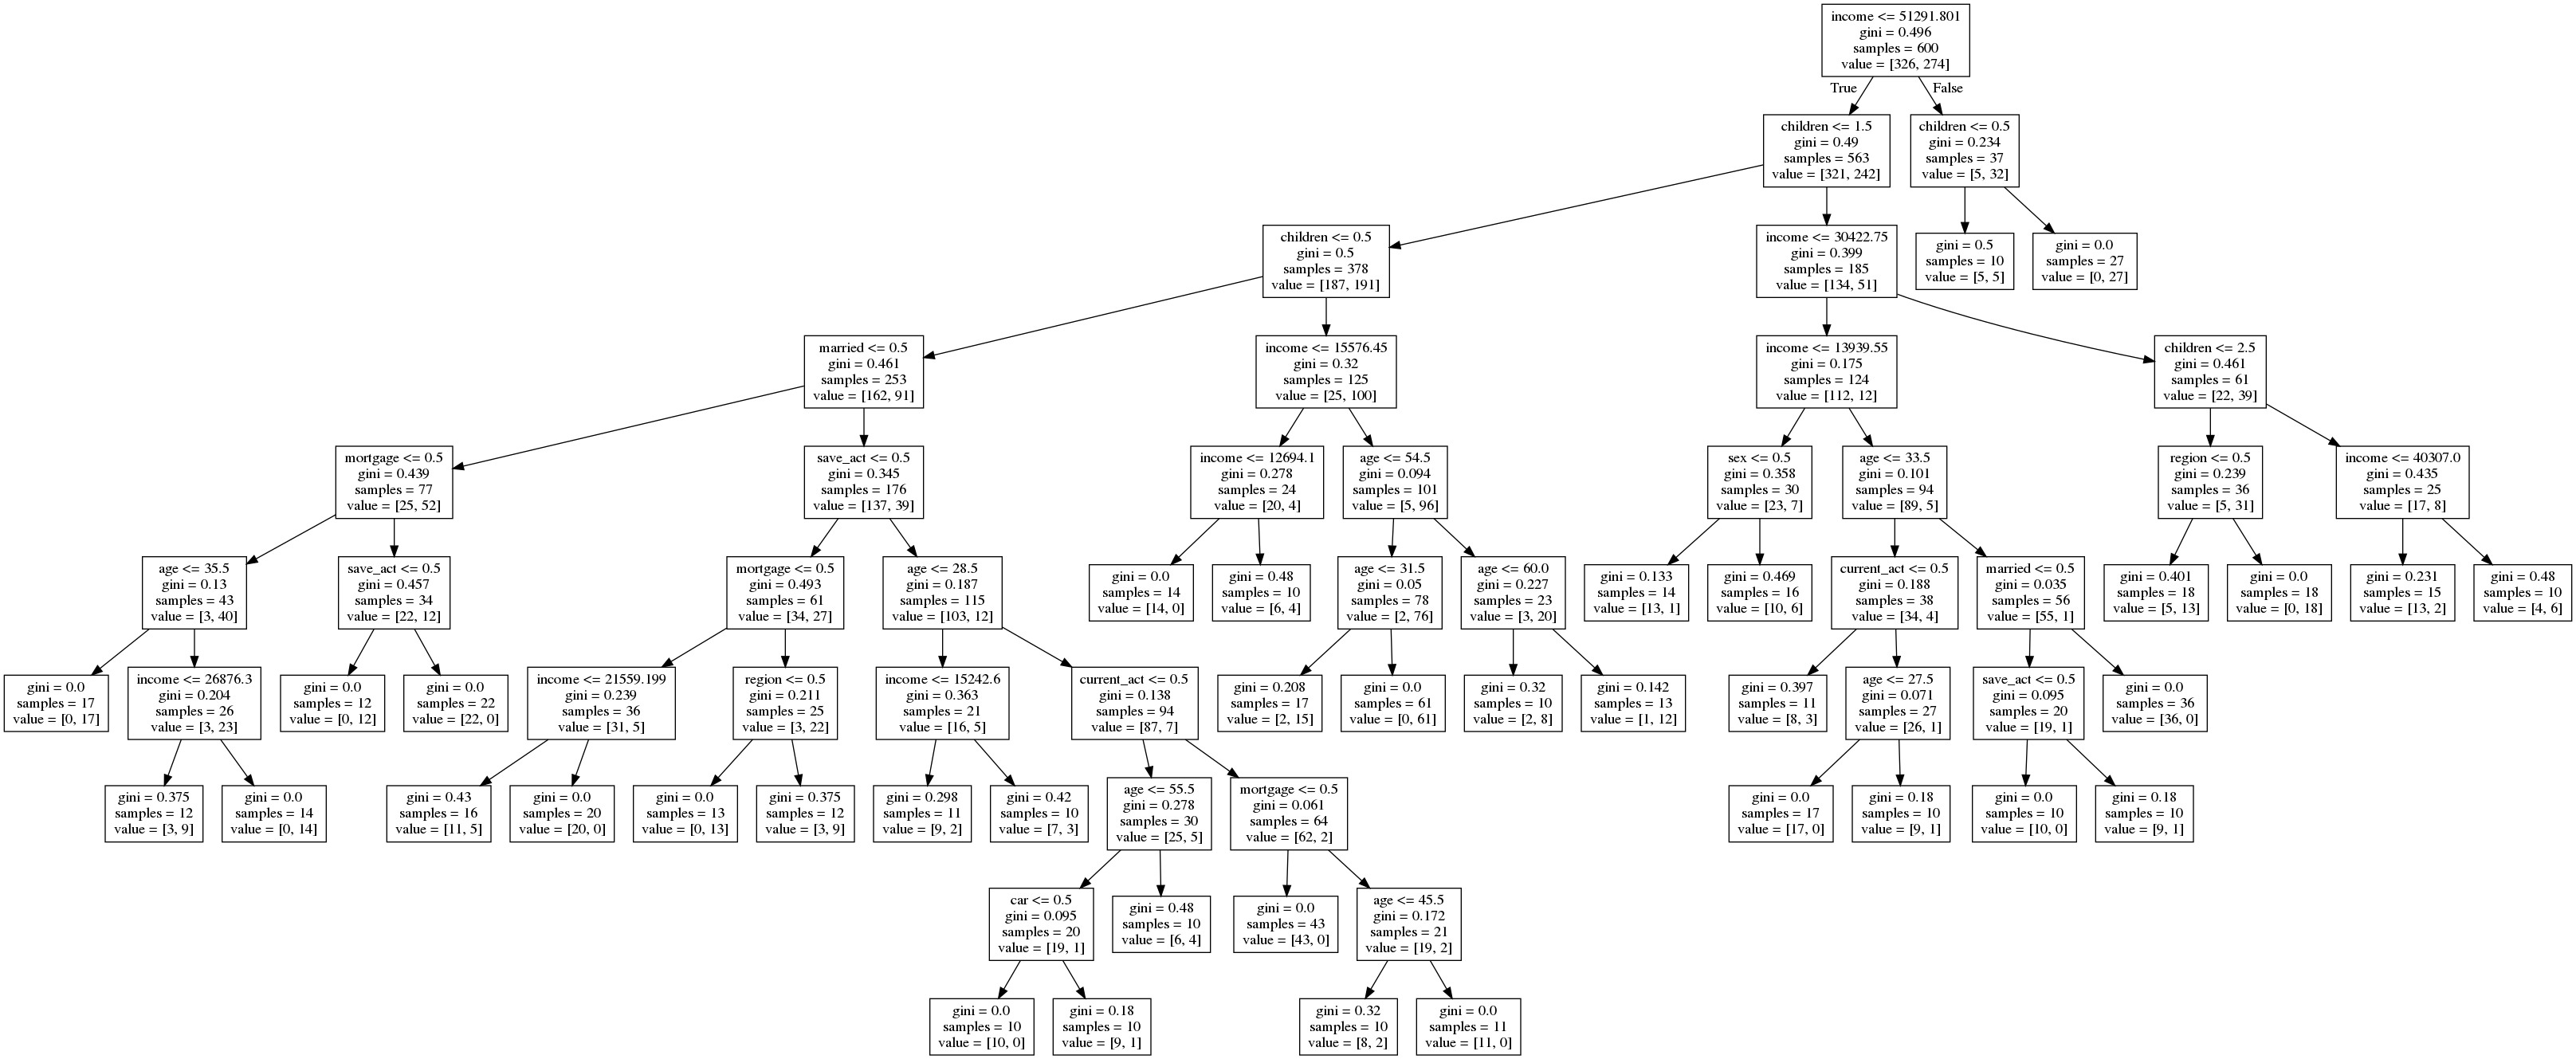

In [18]:
#Saving the generated tree to a figure
with open(os.path.join(outputs, "bank_pep.dot"), 'w') as f:
    f = tree.export_graphviz(clf, out_file=f, feature_names=features_list)
    
#Calling an external program with the operator "!"
!dot -Tpng ../outputs/bank_pep.dot -o ../outputs/bank_pep.png
Image("../outputs/bank_pep.png")

In [19]:
#df_bank2[features_list][0:5]
df_bank2[0:5]

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48,1,0,17546.0,0,1,0,0,0,0,1
1,40,0,1,30085.1,1,3,1,0,1,1,0
2,51,1,0,16575.4,1,0,1,1,1,0,0
3,23,1,1,20375.4,1,3,0,0,1,0,0
4,57,1,3,50576.3,1,0,0,1,0,0,0


In [20]:
new_data = np.array([40,0,1,30085.0,1,3,1,0,1,1]).reshape(1,-1)
clf.predict(new_data)

array([0])

#### Visualizing the decision surface 

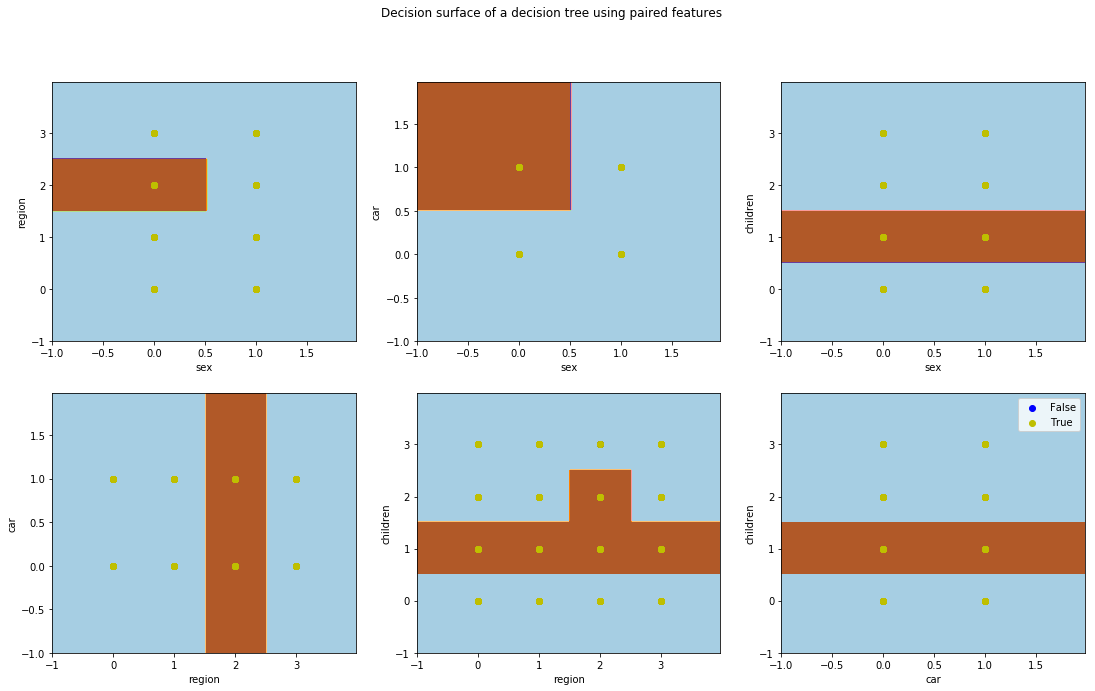

In [21]:
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 2
plot_colors = "by"
plot_step = 0.02
outcome = ['False','True']

for pairidx, pair in enumerate([['sex','region'], ['sex', 'car'], ['sex', 'children'],
                                ['region', 'car'], ['region', 'children'], ['car', 'children']]):
    # We only take the two corresponding features
    X = df_bank2[pair].values
    y = df_bank2.pep

    # Shuffle
    #idx = np.arange(X.shape[0])
    #np.random.seed(13)
    #np.random.shuffle(idx)
    #X = X[idx]
    #y = y[idx]

    # Standardize
    #mean = X.mean(axis=0)
    #std = X.std(axis=0)
    #X = (X - mean) / std

    # Train
    clf2 = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[:, 0], X[:, 1], c=color, label=outcome[i], cmap=plt.cm.Paired)
    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
fig = plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.legend()
plt.show()

#### K-Means Clustering

http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html

In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from mpl_toolkits.mplot3d import Axes3D

In [23]:
centers = [[1, 1], [-1, -1], [1, -1]]

X = df_bank2[['age','income','region']].values

estimators = {'k_means_3': KMeans(n_clusters=3),
              'k_means_8': KMeans(n_clusters=8),
              'k_means_bad_init': KMeans(n_clusters=3, n_init=1, init='random')}

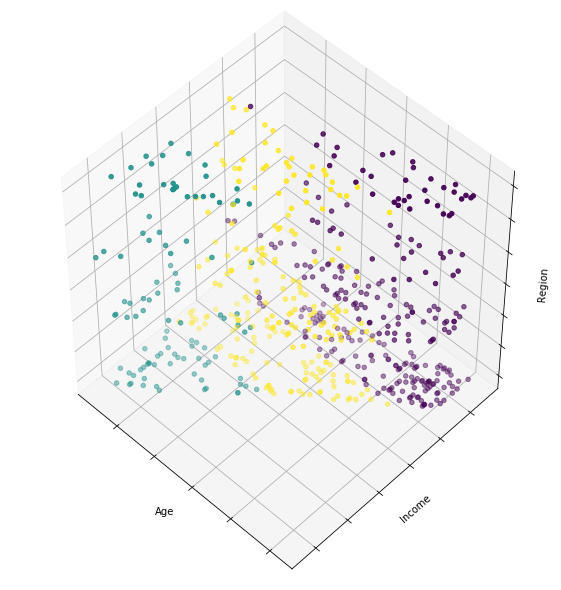

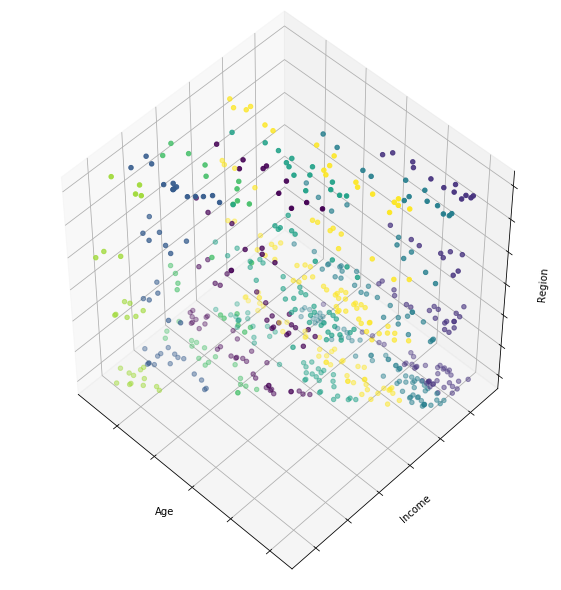

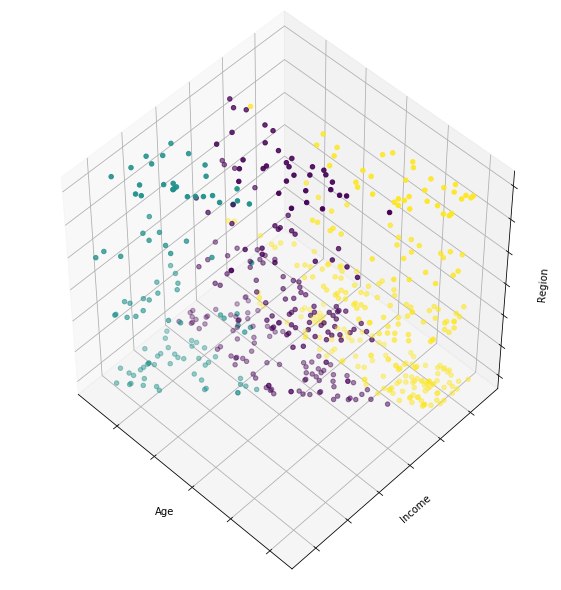

In [24]:
fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(8,8))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels.astype(np.float))
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Age')
    ax.set_ylabel('Income')
    ax.set_zlabel('Region')
    ax.set_label(name)
    fignum = fignum + 1

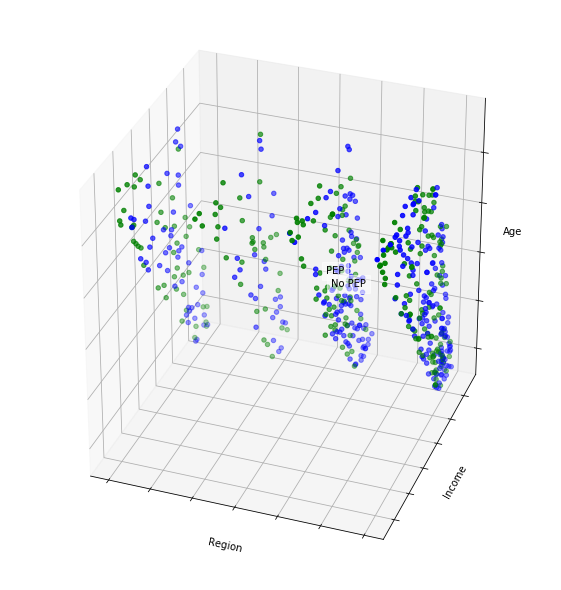

In [25]:
# Plot the ground truth
fig = plt.figure(fignum, figsize=(8, 8))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=110)

plt.cla()

X = df_bank2[['age','income','region']].values
y = df_bank2.pep

for name, label in [('PEP', 1),('No PEP', 0)]:
    ax.text3D(X[y == label, 2].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 0].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, ['b','g'])
ax.scatter(X[:, 2], X[:, 1], X[:, 0], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Region')
ax.set_ylabel('Income')
ax.set_zlabel('Age')
plt.show()

In [26]:
# Adapting the exemple: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html  
from time import time
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [27]:
df_bank2.head(1)

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48,1,0,17546.0,0,1,0,0,0,0,1


In [28]:
np.random.seed(42)
data = scale(df_bank2[features_list])
labels = df_bank2.pep.values
n_samples, n_features = data.shape
n_targets = len(np.unique(labels))
print(data.shape)
print(labels.shape)

(600, 10)
(600,)


n_targets: 2, 	 n_samples 600, 	 n_features 10
_______________________________________________________________________________
init    time  inertia    homo   compl  v-meas     ARI AMI  silhouette
k-means++   0.03s    5204   0.010   0.010   0.010   0.014   0.009    0.117
   random   0.05s    5204   0.010   0.010   0.010   0.014   0.009    0.120
PCA-based   0.01s    5204   0.011   0.011   0.011   0.014   0.010    0.123
_______________________________________________________________________________


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


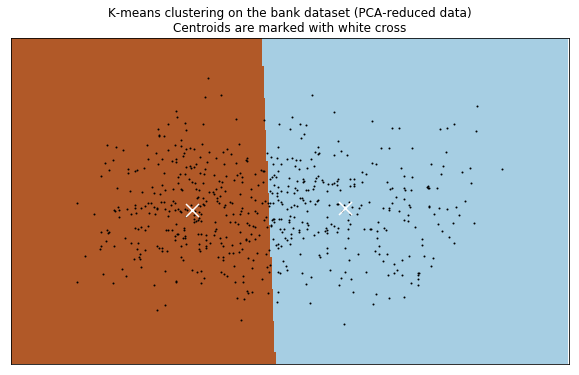

In [29]:
sample_size = 300

print("n_targets: %d, \t n_samples %d, \t n_features %d"
      % (n_targets, n_samples, n_features))

print(79 * '_')
print('% 9s' % 'init'
      '    time  inertia    homo   compl  v-meas     ARI AMI  silhouette')

def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('% 9s   %.2fs    %i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_targets, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_targets, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_targets).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_targets, n_init=1),
              name="PCA-based",
              data=data)
print(79 * '_')

###############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_targets, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10,6))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the bank dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()